# Objective
- Classification Task
- Build a model for predicting hand written digits ranging from 1-10

## Import Starter Libraries and Load Training and Test data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

#Set Seed for reproducible results
from numpy.random import seed
seed(2)
tf.random.set_seed(2)

In [2]:
#Load data
train = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Classification\\digit-recognizer\\train.csv')
test = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\Kaggle files\\Projects - Classification\\digit-recognizer\\test.csv')

#Make Copies
train_data = train[:]
test_data = test[:]

# Exploratory Analysis
- Shape
- Labels
- number of classes
- missing values

In [3]:
#Shape
train_data.shape

(42000, 785)

In [4]:
#Column Labels
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Smallest and Largest value among the explanatory variables
train_data.iloc[:, 1:].min().min(), train_data.iloc[:, 1:].max().max()

(0, 255)

In [6]:
#Missing Values
train_data.isnull().sum().sum()

0

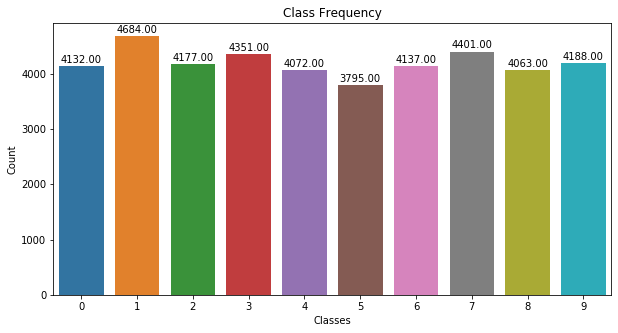

In [7]:
#Class Distribution
figure(figsize=(10,5))
ax = sns.countplot(train_data['label'])

for c in ax.patches:
    height = c.get_height()
    ax.text(c.get_x() + c.get_width()/2.,
            height + 60,
            '{:1.2f}'.format(height),
            ha="center")

plt.title('Class Frequency')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

## Data Transformation
- Scale inputs (normalization)
- LeNet-5 takes 32x32 image as input. Images in our training dataset are 28x28 so we will pad them with zeros to reshape to them to 32x32 images

In [8]:
#Split Training data into Target and Explanatory Variables
X = train_data.iloc[:, 1:]
y = train_data.iloc[:, 0]

In [9]:
#normalization of explanatory variables
#use a simple grey scale
X = X/255

In [10]:
#Reshaping dataset as CNN works best with higher dimensions
X = X.values.reshape(-1,28,28,1)

In [11]:
# Pad images with 0s
X = np.pad(X, ((0,0),(2,2),(2,2),(0,0)), 'constant') 
print("Updated Image Shape: {}".format(X[0].shape))

Updated Image Shape: (32, 32, 1)


<function matplotlib.pyplot.show(*args, **kw)>

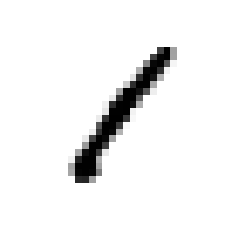

In [12]:
#observation of one image in the mnist data array
some_digit = X[0]
some_digit_image = some_digit.reshape(32, 32)
plt.imshow(some_digit_image, cmap ='binary')
plt.axis('off')
plt.show

# Modeling
- We are going to build a model based on the LeNet 5 Architecture

In [13]:
#Split training dataset with training, test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [14]:
# Set the CNN model 
model = keras.Sequential()

#Layer 1
model.add(keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation ='relu', input_shape = (32, 32, 1)))
model.add(keras.layers.AveragePooling2D(pool_size = 2, strides = 2))

#layer 2
model.add(keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation ='relu'))
model.add(keras.layers.AveragePooling2D(pool_size = 2, strides = 2))

#Fully Connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation = "relu"))
model.add(keras.layers.Dense(84, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [15]:
#summary() method displays the model's layers, their names, their output shapes and number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [16]:
#compiling the model
model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

In [17]:
#Training and evaluating the model
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val))

Train on 29400 samples, validate on 12600 samples
Epoch 1/10
29400/29400 [==============================] - 23s 783us/sample - loss: 0.3301 - accuracy: 0.8986 - val_loss: 0.1373 - val_accuracy: 0.9566
Epoch 2/10
29400/29400 [==============================] - 26s 895us/sample - loss: 0.1025 - accuracy: 0.9689 - val_loss: 0.0803 - val_accuracy: 0.9757
Epoch 3/10
29400/29400 [==============================] - 28s 955us/sample - loss: 0.0696 - accuracy: 0.9780 - val_loss: 0.0655 - val_accuracy: 0.9794
Epoch 4/10
29400/29400 [==============================] - 28s 963us/sample - loss: 0.0563 - accuracy: 0.9830 - val_loss: 0.0681 - val_accuracy: 0.9791
Epoch 5/10
29400/29400 [==============================] - 29s 973us/sample - loss: 0.0440 - accuracy: 0.9851 - val_loss: 0.0755 - val_accuracy: 0.9779
Epoch 6/10
29400/29400 [==============================] - 28s 963us/sample - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0602 - val_accuracy: 0.9826
Epoch 7/10
29400/29400 [====================

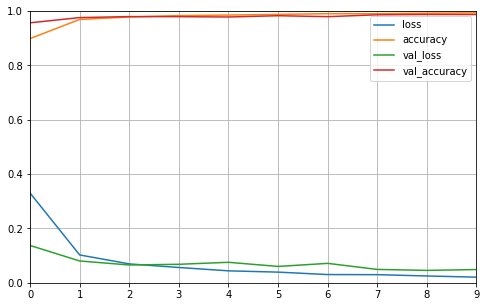

In [18]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.evaluate(X_val, y_val)

12600/12600 [==============================] - 1s 107us/sample - loss: 0.0488 - accuracy: 0.9871


[0.04877962916413145, 0.98706347]

In [27]:
Y_pred = model.predict_classes(X_val)
Y_pred

array([8, 1, 9, ..., 5, 5, 0], dtype=int64)

In [28]:
#print a classification report depicting the precision, recall, and f1-score of t=the different classes and overall model
from sklearn.metrics import classification_report
class_rep_rf = classification_report(y_val, Y_pred)
print(class_rep_rf)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1200
           1       1.00      0.99      0.99      1389
           2       0.98      0.99      0.99      1294
           3       0.99      0.99      0.99      1355
           4       0.98      0.99      0.99      1222
           5       0.99      0.98      0.99      1085
           6       0.99      0.99      0.99      1256
           7       0.99      0.99      0.99      1359
           8       0.99      0.98      0.99      1209
           9       0.99      0.98      0.98      1231

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [29]:
# predicting test data results
test_data.keys()

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [30]:
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#use a simple grey scale
X1 = test_data/255
#Reshaping dataset as CNN works best with higher dimensions
X1 = X1.values.reshape(-1,28,28,1)
# Pad images with 0s
X1 = np.pad(X1, ((0,0),(2,2),(2,2),(0,0)), 'constant') 
print("Updated Image Shape: {}".format(X[0].shape))

Updated Image Shape: (32, 32, 1)


In [32]:
test_data['Label'] = model.predict_classes(X1)

C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
test_data['Label'].value_counts()

1    3167
7    2908
2    2814
3    2806
4    2794
0    2765
9    2755
6    2754
8    2742
5    2495
Name: Label, dtype: int64

In [34]:
test_data['ImageId'] = [i + 1 for i in range(len(test_data))]

C:\Users\Inno Mvula\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
test_data[['ImageId', 'Label']]

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [36]:
prediction = test_data[['ImageId', 'Label']]
prediction.to_csv("LeNetMnist10.csv", index=False)
prediction

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
